# Prepare Chicago Crime Data for a GitHub Repository

- Original Notebook Source: https://github.com/coding-dojo-data-science/preparing-chicago-crime-data
- Updated 11/17/22

>- This notebook will process a "Crimes - 2001 to Preset.csv" crime file in your Downloads folder and save it as smaller .csv's in a new "Data/Chicago/" folder inside this notebook's folder/repo.

# INSTRUCTIONS

- 1) Go to the Chicago Data Portal's page for ["Crimes - 2001 to Preset"](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2).

- 2) Click on the Export button on the top right and select CSV. 
    - Save the file to your Downloads folder instead of your repository. **The file is too big for a repository.**
    
    
    
- 3) Wait for the full file to download. 
    - It is very large (over >1.7GB and may take several minutes to fully download.)
    
    
- 4) Once the download is complete, change `RAW_FILE` variable below to match the filepath to the downloaded file.

## 🚨 Set the correct `RAW_FILE` path

- The cell below will attempt to check your Downloads folder for any file with a name that contains "Crimes_-_2001_to_Present".
    - If you know the file path already, you can skip the next cell and just manually set the RAW_FILE variable in the following code cell.

In [1]:
## Run the cell below to attempt to programmatically find your crime file
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['HOME']
# print("- Your Home Folder is: " + home_folder)

## Check for downloads folder
if 'Downloads' in os.listdir(home_folder):
    
    
    # Print the Downloads folder path
    dl_folder = os.path.abspath(os.path.join(home_folder,'Downloads'))
    print(f"- Your Downloads folder is '{dl_folder}/'\n")
    
    ## checking for crime files using glob
    crime_files = sorted(glob.glob(dl_folder+'/**/Crimes_-_2001_to_Present*',recursive=True))
    
    # If more than 
    if len(crime_files)==1:
        RAW_FILE = crime_files[0]
        
    elif len(crime_files)>1:
        print('[i] The following files were found:')
        
        for i, fname in enumerate(crime_files):
            print(f"\tcrime_files[{i}] = '{fname}'")
        print(f'\n- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.')

else:
    print(f'[!] Could not programmatically find your downloads folder.')
    print('- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.')


- Your Downloads folder is '/Users/sharheatherclark/Downloads/'



In [8]:
## (Required) MAKE SURE TO CHANGE THIS VARIABLE TO MATCH YOUR LOCAL FILE NAME
RAW_FILE = "/Users/sharheatherclark/Downloads/Crimes_-_2001_to_Present.csv" #(or slice correct index from the crime_files list)

if RAW_FILE == "/Users/sharheatherclark/Downloads/Crimes_-_2001_to_Present.csv":
	raise Exception("You must update the RAW_FILE variable to match your local filepath.")
	
RAW_FILE

Exception: You must update the RAW_FILE variable to match your local filepath.

In [22]:
## (Optional) SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# 🔄 Full Workflow

- Now that your RAW_FILE variable is set either:
    - On the toolbar, click on the Kernel menu > "Restart and Run All".
    - OR click on this cell first, then on the toolbar click on the "Cell" menu > "Run All Below"

In [9]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")

In [10]:
chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.00,12.00,61.00,08B,"1,165,074.00","1,875,917.00",2015,02/10/2018 03:50:01 PM,41.82,-87.67,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.00,29.00,25.00,06,"1,138,875.00","1,904,869.00",2015,02/10/2018 03:50:01 PM,41.90,-87.77,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.00,8.00,44.00,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.00,35.00,21.00,18,"1,152,037.00","1,920,384.00",2015,02/10/2018 03:50:01 PM,41.94,-87.72,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.00,28.00,25.00,08A,"1,141,706.00","1,900,086.00",2015,02/10/2018 03:50:01 PM,41.88,-87.76,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813149,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,1934,19.00,44.00,6.00,26,"1,172,497.00","1,919,410.00",2022,01/03/2023 03:46:28 PM,41.93,-87.64,"(41.934304581, -87.641484982)"
7813150,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,531,5.00,9.00,49.00,11,"1,179,966.00","1,828,818.00",2022,01/03/2023 03:46:28 PM,41.69,-87.62,"(41.685543881, -87.616812541)"
7813151,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,331,3.00,5.00,43.00,06,"1,193,181.00","1,859,005.00",2022,01/03/2023 03:46:28 PM,41.77,-87.57,"(41.768068052, -87.567452932)"
7813152,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,1623,16.00,45.00,11.00,18,"1,140,553.00","1,933,418.00",2022,01/03/2023 03:46:28 PM,41.97,-87.76,"(41.973391184, -87.758534512)"


In [11]:
# explicitly setting the format to speed up pd.to_datetime
date_format = "%m/%d/%Y %H:%M:%S %p"


### Demonstrating/testing date_format
example = chicago_full.loc[0,'Date']
display(example)
pd.to_datetime(example,format=date_format)

'09/05/2015 01:30:00 PM'

Timestamp('2015-09-05 01:30:00')

In [12]:
# this cell can take up to 1 min to run
chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full = chicago_full.set_index('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Datetime,,,,,,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1312557,G001203,01/01/2001 01:00:00 PM,109XX S MICHIGAN AV,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,513,5.00,NaN,NaN,07,"1,178,895.00","1,832,264.00",2001,08/17/2015 03:03:40 PM,41.70,-87.62,"(41.695024578, -87.620628832)"
2001-01-01 01:00:00,1310393,G000713,01/01/2001 01:00:00 AM,052XX N EAST RIVER RD,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.00,NaN,NaN,14,"1,116,671.00","1,933,824.00",2001,08/17/2015 03:03:40 PM,41.97,-87.85,"(41.974911416, -87.846347904)"
2001-01-01 01:00:00,1311226,G000964,01/01/2001 01:00:00 AM,022XX W CORNELIA AV,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.00,NaN,NaN,14,"1,160,728.00","1,923,242.00",2001,08/17/2015 03:03:40 PM,41.95,-87.68,"(41.945072291, -87.684629263)"
2001-01-01 01:00:00,1310858,G001441,01/01/2001 01:00:00 PM,032XX W BELLE PLAINE AV,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.00,NaN,NaN,26,"1,154,092.00","1,927,036.00",2001,08/17/2015 03:03:40 PM,41.96,-87.71,"(41.955618511, -87.708919081)"
2001-01-01 01:00:00,1311503,G001102,01/01/2001 01:00:00 AM,026XX N HALSTED ST,0264,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,1933,19.00,NaN,NaN,02,"1,170,510.00","1,918,326.00",2001,08/17/2015 03:03:40 PM,41.93,-87.65,"(41.931373805, -87.648818936)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 12:50:00,13091442,JG282299,05/31/2023 12:50:00 PM,065XX S PAULINA ST,0920,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,725,7.00,15.00,67.00,07,"1,166,122.00","1,861,337.00",2023,06/07/2023 04:52:36 PM,41.78,-87.67,"(41.775085745, -87.666570149)"
2023-05-31 12:50:00,13092455,JG282261,05/31/2023 12:50:00 PM,039XX N NORMANDY AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1632,16.00,38.00,17.00,08B,"1,131,006.00","1,925,627.00",2023,06/07/2023 04:52:36 PM,41.95,-87.79,"(41.952182277, -87.793822107)"
2023-05-31 12:52:00,13093687,JG285162,05/31/2023 12:52:00 PM,005XX W ROOSEVELT RD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,CURRENCY EXCHANGE,False,False,124,1.00,28.00,28.00,11,"1,172,693.00","1,894,968.00",2023,06/07/2023 04:52:36 PM,41.87,-87.64,"(41.86723004, -87.641489077)"


In [13]:
(chicago_full.isna().sum()/len(chicago_full)).round(2)

ID                     0.00
Case Number            0.00
Date                   0.00
Block                  0.00
IUCR                   0.00
Primary Type           0.00
Description            0.00
Location Description   0.00
Arrest                 0.00
Domestic               0.00
Beat                   0.00
District               0.00
Ward                   0.08
Community Area         0.08
FBI Code               0.00
X Coordinate           0.01
Y Coordinate           0.01
Year                   0.00
Updated On             0.00
Latitude               0.01
Longitude              0.01
Location               0.01
dtype: float64

## Separate the Full Dataset by Years

In [14]:
# save the years for every crime
chicago_full["Year"] = chicago_full.index.year
chicago_full["Year"] = chicago_full["Year"].astype(str)
chicago_full["Year"].value_counts()

2002    486804
2001    485882
2003    475981
2004    469421
2005    453771
2006    448175
2007    437084
2008    427167
2009    392823
2010    370499
2011    351968
2012    336267
2013    307471
2014    275737
2016    269800
2017    269081
2018    268792
2015    264765
2019    261270
2022    238531
2020    212133
2021    208640
2023    101092
Name: Year, dtype: int64

In [15]:
## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [16]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols).sort_index()#.reset_index()
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1312557,01/01/2001 01:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,513,5.00,NaN,2001,41.70,-87.62
2001-01-01 01:00:00,1310393,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.00,NaN,2001,41.97,-87.85
2001-01-01 01:00:00,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.00,NaN,2001,41.95,-87.68
2001-01-01 01:00:00,1310858,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.00,NaN,2001,41.96,-87.71
2001-01-01 01:00:00,1311503,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,1933,19.00,NaN,2001,41.93,-87.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 12:50:00,13091442,05/31/2023 12:50:00 PM,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,725,7.00,15.00,2023,41.78,-87.67
2023-05-31 12:50:00,13092455,05/31/2023 12:50:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1632,16.00,38.00,2023,41.95,-87.79
2023-05-31 12:52:00,13093687,05/31/2023 12:52:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,CURRENCY EXCHANGE,False,False,124,1.00,28.00,2023,41.87,-87.64


In [17]:
chicago_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7813154 entries, 2001-01-01 01:00:00 to 2023-05-31 12:57:00
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Year                  object 
 11  Latitude              float64
 12  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(5)
memory usage: 730.2+ MB


In [18]:
chicago_final.memory_usage(deep=True).astype(float)

Index                   62,505,232.00
ID                      62,505,232.00
Date                   617,239,166.00
Primary Type           523,790,327.00
Description            571,890,107.00
Location Description   532,558,630.00
Arrest                   7,813,154.00
Domestic                 7,813,154.00
Beat                    62,505,232.00
District                62,505,232.00
Ward                    62,505,232.00
Year                   476,602,394.00
Latitude                62,505,232.00
Longitude               62,505,232.00
dtype: float64

In [19]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [20]:
FINAL_DROP = ['Datetime','Year']#,'Location Description']

In [23]:
## set save location 

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[ year]
    temp_df = temp_df.reset_index(drop=False)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to Data/Chicago/
- Succesfully saved Data/Chicago/Chicago-Crime_2001.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2002.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2003.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2004.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2005.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2006.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2007.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2008.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2009.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2010.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2011.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2012.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2013.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2014.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2015.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2016.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2017.csv
- Succesfully

In [24]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

['Data/Chicago/Chicago-Crime_2001.csv',
 'Data/Chicago/Chicago-Crime_2002.csv',
 'Data/Chicago/Chicago-Crime_2003.csv',
 'Data/Chicago/Chicago-Crime_2004.csv',
 'Data/Chicago/Chicago-Crime_2005.csv',
 'Data/Chicago/Chicago-Crime_2006.csv',
 'Data/Chicago/Chicago-Crime_2007.csv',
 'Data/Chicago/Chicago-Crime_2008.csv',
 'Data/Chicago/Chicago-Crime_2009.csv',
 'Data/Chicago/Chicago-Crime_2010.csv',
 'Data/Chicago/Chicago-Crime_2011.csv',
 'Data/Chicago/Chicago-Crime_2012.csv',
 'Data/Chicago/Chicago-Crime_2013.csv',
 'Data/Chicago/Chicago-Crime_2014.csv',
 'Data/Chicago/Chicago-Crime_2015.csv',
 'Data/Chicago/Chicago-Crime_2016.csv',
 'Data/Chicago/Chicago-Crime_2017.csv',
 'Data/Chicago/Chicago-Crime_2018.csv',
 'Data/Chicago/Chicago-Crime_2019.csv',
 'Data/Chicago/Chicago-Crime_2020.csv',
 'Data/Chicago/Chicago-Crime_2021.csv',
 'Data/Chicago/Chicago-Crime_2022.csv',
 'Data/Chicago/Chicago-Crime_2023.csv']

In [25]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



## Confirmation

- Follow the example usage above to test if your files were created successfully.

In [26]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1312557,01/01/2001 01:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,513,5.00,NaN,41.70,-87.62
1,1310393,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.00,NaN,41.97,-87.85
2,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.00,NaN,41.95,-87.68
3,1310858,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.00,NaN,41.96,-87.71
4,1311503,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,1933,19.00,NaN,41.93,-87.65
...,...,...,...,...,...,...,...,...,...,...,...,...
101087,13091442,05/31/2023 12:50:00 PM,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,725,7.00,15.00,41.78,-87.67
101088,13092455,05/31/2023 12:50:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1632,16.00,38.00,41.95,-87.79
101089,13093687,05/31/2023 12:52:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,CURRENCY EXCHANGE,False,False,124,1.00,28.00,41.87,-87.64
101090,13094726,05/31/2023 12:55:00 PM,CRIMINAL TRESPASS,TO LAND,RESTAURANT,False,False,112,1.00,34.00,41.88,-87.62


In [27]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    485882
2002    486804
2003    475981
2004    469421
2005    453771
2006    448175
2007    437084
2008    427167
2009    392823
2010    370499
2011    351968
2012    336267
2013    307471
2014    275737
2015    264765
2016    269800
2017    269081
2018    268792
2019    261270
2020    212133
2021    208640
2022    238531
2023    101092
Name: Date, dtype: int64

## Summary

- The chicago crime dataset has now been saved to your repository as csv files. 
- You should save your notebook, commit your work and push to GitHub using GitHub desktop.

# Answering Stakeholder Questions
## 1. Comparing Police Districts:
- Which district has the most crimes?


In [28]:
chicago_full.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Datetime,,,,,,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1312557,G001203,01/01/2001 01:00:00 PM,109XX S MICHIGAN AV,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,513,5.00,NaN,NaN,07,"1,178,895.00","1,832,264.00",2001,08/17/2015 03:03:40 PM,41.70,-87.62,"(41.695024578, -87.620628832)"
2001-01-01 01:00:00,1310393,G000713,01/01/2001 01:00:00 AM,052XX N EAST RIVER RD,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.00,NaN,NaN,14,"1,116,671.00","1,933,824.00",2001,08/17/2015 03:03:40 PM,41.97,-87.85,"(41.974911416, -87.846347904)"
2001-01-01 01:00:00,1311226,G000964,01/01/2001 01:00:00 AM,022XX W CORNELIA AV,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.00,NaN,NaN,14,"1,160,728.00","1,923,242.00",2001,08/17/2015 03:03:40 PM,41.95,-87.68,"(41.945072291, -87.684629263)"
2001-01-01 01:00:00,1310858,G001441,01/01/2001 01:00:00 PM,032XX W BELLE PLAINE AV,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.00,NaN,NaN,26,"1,154,092.00","1,927,036.00",2001,08/17/2015 03:03:40 PM,41.96,-87.71,"(41.955618511, -87.708919081)"
2001-01-01 01:00:00,1311503,G001102,01/01/2001 01:00:00 AM,026XX N HALSTED ST,0264,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,1933,19.00,NaN,NaN,02,"1,170,510.00","1,918,326.00",2001,08/17/2015 03:03:40 PM,41.93,-87.65,"(41.931373805, -87.648818936)"


In [36]:
#drop any columns we do not need, make a new df
df1 = chicago_full.drop(columns = ['ID', 'Case Number', 'Date', 'Block', 'Ward', 'Beat', 'Community Area', 'Year',
                                  'FBI Code', 'X Coordinate', 'Y Coordinate','Updated On', 
                                  'Latitude', 'Longitude','Location Description', 'IUCR','Location'], axis = 1)
df1.head()

,Primary Type,Description,Arrest,Domestic,District
Datetime,,,,,
2001-01-01 01:00:00,MOTOR VEHICLE THEFT,AUTOMOBILE,False,False,5.00
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,False,False,16.00
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,False,False,19.00
2001-01-01 01:00:00,OTHER OFFENSE,TELEPHONE THREAT,False,False,17.00
2001-01-01 01:00:00,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,False,False,19.00


In [39]:
df1['District'].value_counts()

8.00     524976
11.00    501293
6.00     456923
7.00     451626
25.00    444506
4.00     443561
3.00     396237
12.00    387322
9.00     381670
2.00     369931
19.00    350788
18.00    350673
5.00     346207
10.00    336605
15.00    334732
1.00     316093
14.00    302261
16.00    261586
22.00    256086
24.00    236058
17.00    225526
20.00    138201
31.00       242
21.00         4
Name: District, dtype: int64

## District 8 had the most crimes and district 21 had the least amount of crimes. 

# 2. Crimes Across the Years:
- Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [57]:
#drop any columns we do not need, make a new df
df2 = chicago_full.drop(columns = ['ID', 'Case Number', 'Date', 'Block', 'Ward', 'Beat', 'Community Area', 'District', 
                                    'FBI Code', 'X Coordinate', 'Y Coordinate','Updated On', 
                                  'Latitude', 'Longitude','Location Description', 'IUCR','Location'], axis = 1)
df2

,Primary Type,Description,Arrest,Domestic,Year
Datetime,,,,,
2001-01-01 01:00:00,MOTOR VEHICLE THEFT,AUTOMOBILE,False,False,2001
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,False,False,2001
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,False,False,2001
2001-01-01 01:00:00,OTHER OFFENSE,TELEPHONE THREAT,False,False,2001
2001-01-01 01:00:00,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,False,False,2001
...,...,...,...,...,...
2023-05-31 12:50:00,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,False,False,2023
2023-05-31 12:50:00,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,2023
2023-05-31 12:52:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,False,2023


In [58]:

df2.describe()

,Primary Type,Description,Arrest,Domestic,Year
count,7813154,7813154,7813154,7813154,7813154
unique,36,546,2,2,23
top,THEFT,SIMPLE,False,False,2002
freq,1648213,916905,5774879,6731806,486804


In [62]:
#resample by year, agg by sum
df2_res = df2.groupby('Primary Type').resample("Y").sum()
df2_res

/var/folders/xw/n3kj7zts4fjg477wm5hmpsyc0000gn/T/ipykernel_2219/3321908881.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_res = df2.groupby('Primary Type').resample("Y").sum()
/var/folders/xw/n3kj7zts4fjg477wm5hmpsyc0000gn/T/ipykernel_2219/3321908881.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_res = df2.groupby('Primary Type').resample("Y").sum()
/var/folders/xw/n3kj7zts4fjg477wm5hmpsyc0000gn/T/ipykernel_2219/3321908881.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numer

/var/folders/xw/n3kj7zts4fjg477wm5hmpsyc0000gn/T/ipykernel_2219/3321908881.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_res = df2.groupby('Primary Type').resample("Y").sum()
/var/folders/xw/n3kj7zts4fjg477wm5hmpsyc0000gn/T/ipykernel_2219/3321908881.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_res = df2.groupby('Primary Type').resample("Y").sum()
/var/folders/xw/n3kj7zts4fjg477wm5hmpsyc0000gn/T/ipykernel_2219/3321908881.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numer

Arrest  Domestic
Primary Type      Datetime                    
ARSON             2001-12-31     181        59
                  2002-12-31     156        71
                  2003-12-31     140        53
                  2004-12-31     109        37
                  2005-12-31     121        39
...                              ...       ...
WEAPONS VIOLATION 2019-12-31    4223        16
                  2020-12-31    5449        19
                  2021-12-31    5561        49
                  2022-12-31    5390        62
                  2023-12-31    2076        13

[754 rows x 2 columns]

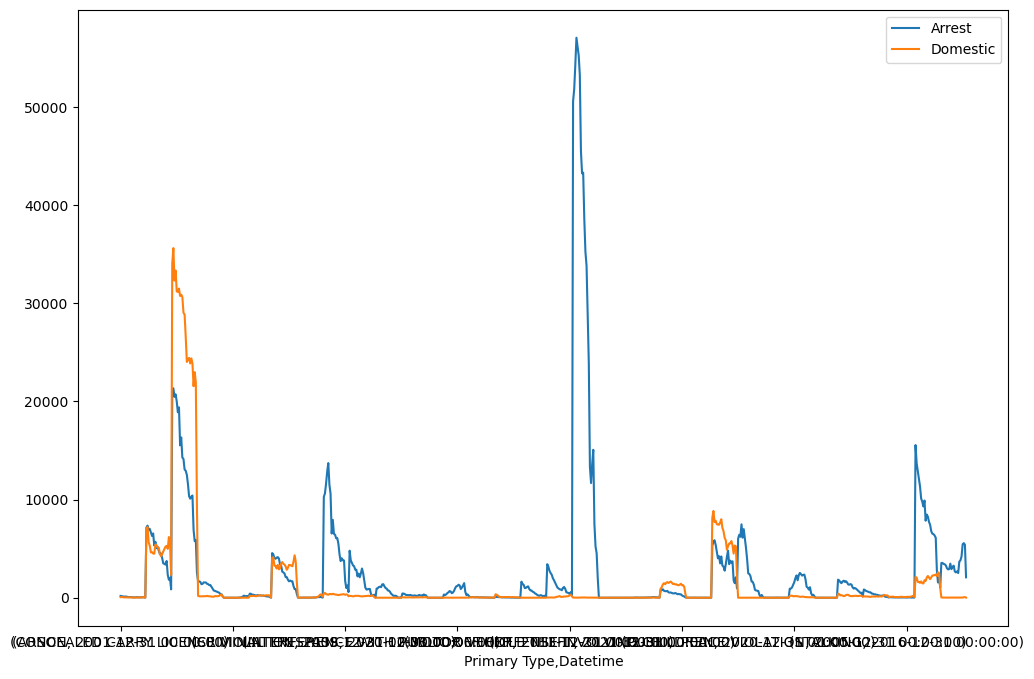

In [64]:
df2_res.plot(figsize=(12,8));

In [68]:
df2_res.index.get_level_values(0)
# 0 is primary type
# 1 is date # print(df2_res.index.get_level_values(1))

Index(['ARSON', 'ARSON', 'ARSON', 'ARSON', 'ARSON', 'ARSON', 'ARSON', 'ARSON',
       'ARSON', 'ARSON',
       ...
       'WEAPONS VIOLATION', 'WEAPONS VIOLATION', 'WEAPONS VIOLATION',
       'WEAPONS VIOLATION', 'WEAPONS VIOLATION', 'WEAPONS VIOLATION',
       'WEAPONS VIOLATION', 'WEAPONS VIOLATION', 'WEAPONS VIOLATION',
       'WEAPONS VIOLATION'],
      dtype='object', name='Primary Type', length=754)

In [69]:
unstacked = df2_res.unstack(level = 0)
unstacked

Arrest                              \
Primary Type  ARSON  ASSAULT   BATTERY BURGLARY   
Datetime                                          
2001-12-31   181.00 7,150.00 20,464.00 1,694.00   
2002-12-31   156.00 7,341.00 21,330.00 1,667.00   
2003-12-31   140.00 6,910.00 20,459.00 1,611.00   
2004-12-31   109.00 7,005.00 20,718.00 1,377.00   
2005-12-31   121.00 6,631.00 19,994.00 1,413.00   
2006-12-31   117.00 6,288.00 18,892.00 1,560.00   
2007-12-31    93.00 6,551.00 19,385.00 1,551.00   
2008-12-31    59.00 5,316.00 15,520.00 1,553.00   
2009-12-31    69.00 5,700.00 16,324.00 1,415.00   
2010-12-31    66.00 5,051.00 14,278.00 1,384.00   
2011-12-31    48.00 5,185.00 14,139.00 1,273.00   
2012-12-31    46.00 4,792.00 13,062.00 1,288.00   
2013-12-31    46.00 4,467.00 12,929.00 1,104.00   
2014-12-31    34.00 4,507.00 12,519.00   911.00   
2015-12-31    52.00 4,057.00 11,563.00   726.00   
2016-12-31    53.00 3,492.00 10,333.00   698.00   
2017-12-31    40.00 3,461.00 10,088.00   653.00   
2018-12-31    41.00 3,366.00 10,296.00   599.00   
2019-12-31    43.00 3,743.00 10,405.00   545.00   
2020-12-31    41.00 2,331.00  6,913.00   497.00   
2021-12-31    46.00 1,828.00  5,755.00   307.00   
2022-12-31    33.00 2,005.00  5,890.00   343.00   
2023-12-31    15.00   854.00  2,535.00   117.00   

                                                                    \
Primary Type CONCEALED CARRY LICENSE VIOLATION CRIM SEXUAL ASSAULT   
Datetime                                                             
2001-12-31                                1.00              410.00   
2002-12-31                                0.00              402.00   
2003-12-31                                0.00              309.00   
2004-12-31                                0.00              314.00   
2005-12-31                                0.00              276.00   
2006-12-31                                0.00              244.00   
2007-12-31                                0.00              222.00   
2008-12-31                                0.00              272.00   
2009-12-31                                0.00              229.00   
2010-12-31                                0.00              240.00   
2011-12-31                                0.00              228.00   
2012-12-31                                0.00              209.00   
2013-12-31                                0.00              231.00   
2014-12-31                               12.00              184.00   
2015-12-31                               33.00              163.00   
2016-12-31                               34.00              148.00   
2017-12-31                               66.00              121.00   
2018-12-31                              145.00              122.00   
2019-12-31                              212.00               67.00   
2020-12-31                              144.00                3.00   
2021-12-31                              167.00                 NaN   
2022-12-31                              170.00                 NaN   
2023-12-31                               67.00                 NaN   

                                                                        \
Primary Type CRIMINAL DAMAGE CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS   
Datetime                                                                 
2001-12-31          4,548.00                   12.00         10,262.00   
2002-12-31          4,403.00                    4.00         10,632.00   
2003-12-31          4,060.00                    4.00         11,618.00   
2004-12-31          3,965.00                    9.00         12,845.00   
2005-12-31          4,083.00                    9.00         13,710.00   
2006-12-31          4,135.00                    4.00         11,483.00   
2007-12-31          3,994.00                   10.00         10,606.00   
2008-12-31          3,403.00                    8.00          6,541.00   
2009-12-31          3,270.00                    2.0

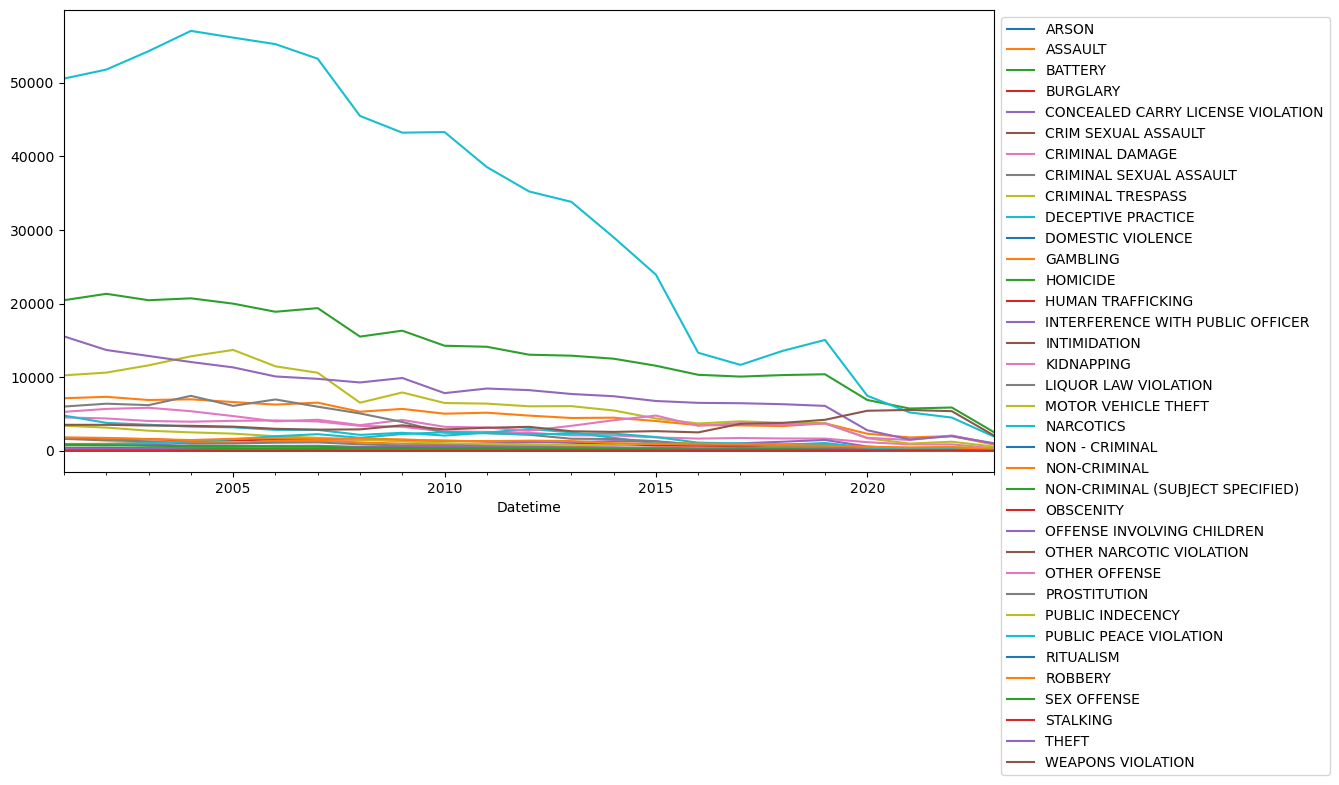

In [81]:
ax = unstacked['Arrest'].plot(figsize = (12,6))
ax.legend(bbox_to_anchor=(1, 1));

## Is the total number of crimes increasing or decreasing across the years?
- Overall, crime is decreasing across the years

## Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?
- concealed carry license had a spike in the recent past, but currently all crimes are in a downturn. 

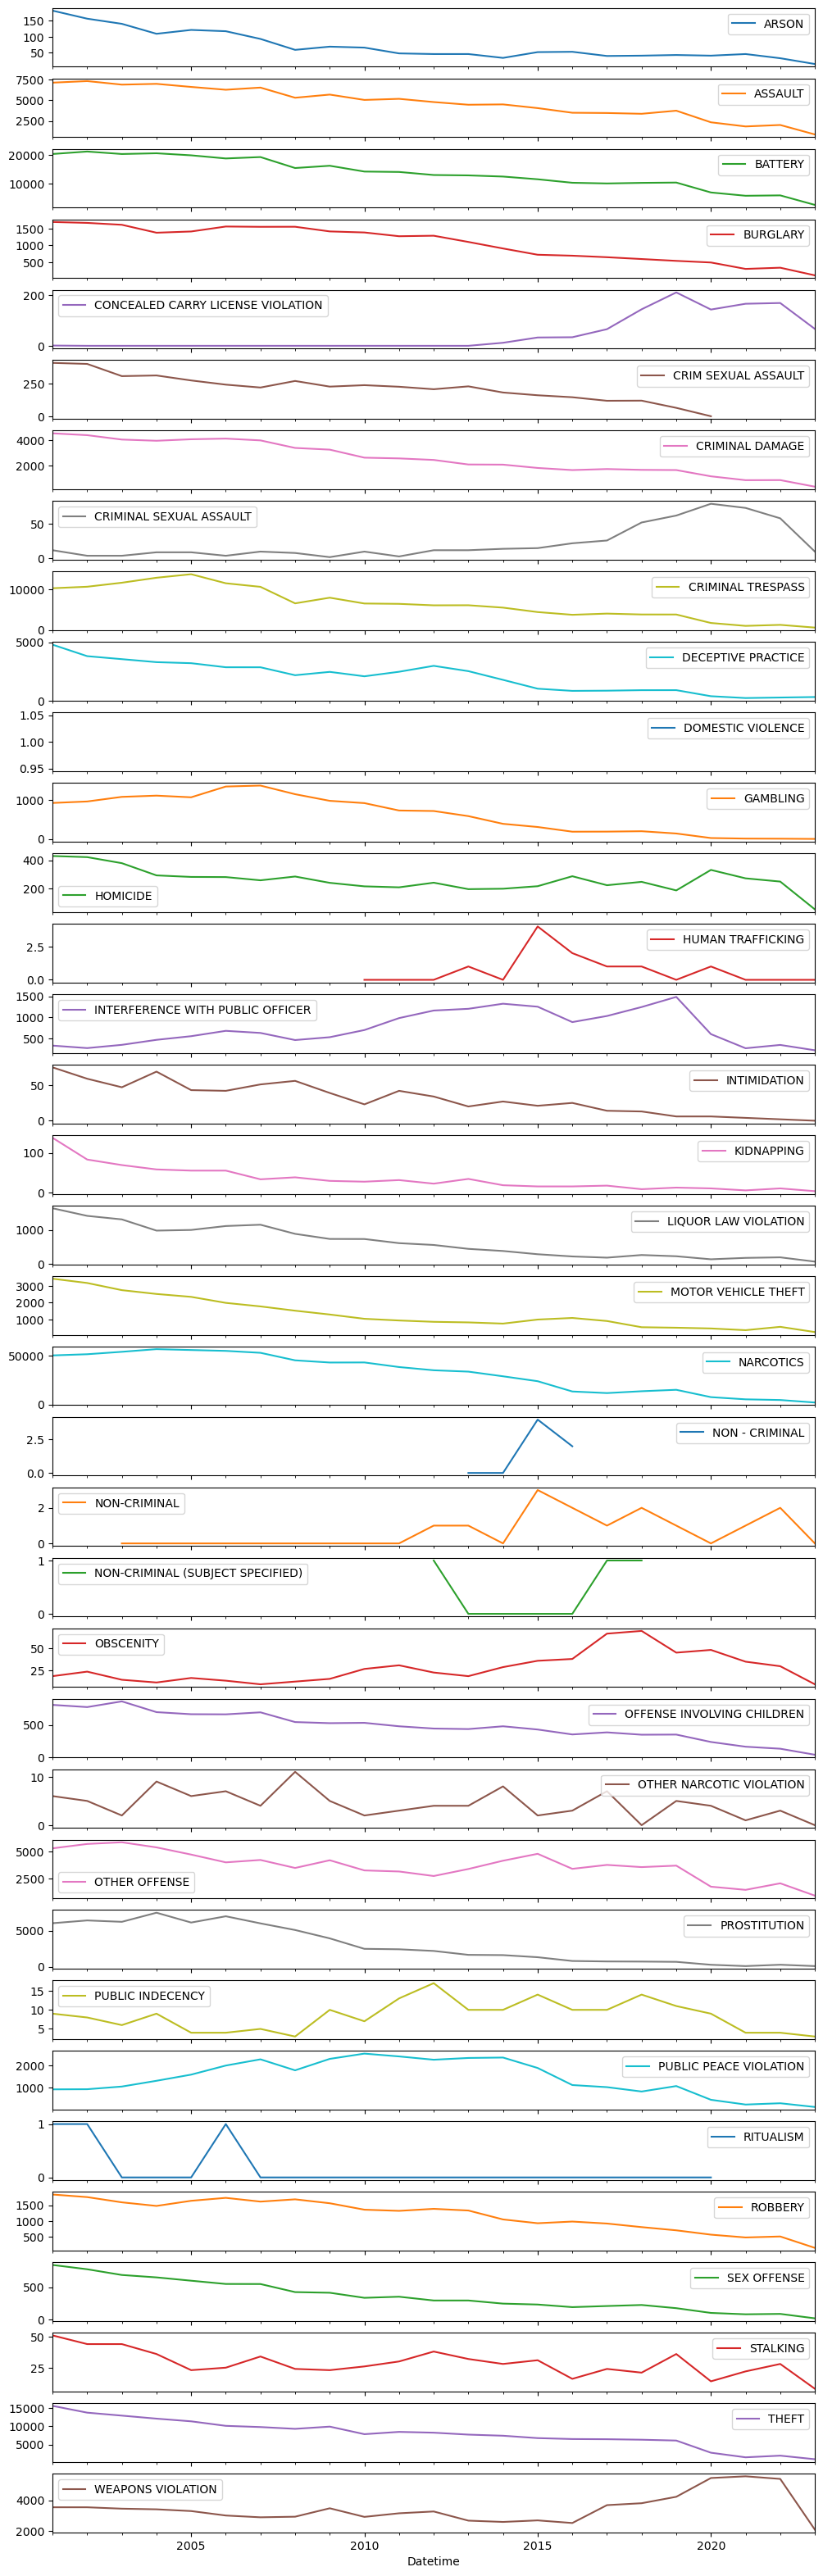

In [85]:
ax = unstacked['Arrest'].plot(figsize = (12, 40), subplots = True)
#ax.legend(bbox_to_anchor=(1, 1));

# 3.  Comparing Months:
- What months have the most crime? What months have the least?
- Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [87]:
# make a new df and feature engineer month by name format
df3 = chicago_full.drop(columns = ['ID', 'Case Number', 'Block', 'Ward', 'Beat', 'Community Area', 'District', 
                                    'FBI Code', 'X Coordinate', 'Y Coordinate','Updated On', 
                                  'Latitude', 'Longitude','Location Description', 'IUCR','Location'], axis = 1)
df3

,Date,Primary Type,Description,Arrest,Domestic,Year
Datetime,,,,,,
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,False,False,2001
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,False,False,2001
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,False,False,2001
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,False,False,2001
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,False,False,2001
...,...,...,...,...,...,...
2023-05-31 12:50:00,05/31/2023 12:50:00 PM,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,False,False,2023
2023-05-31 12:50:00,05/31/2023 12:50:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,2023
2023-05-31 12:52:00,05/31/2023 12:52:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,False,2023


In [89]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7813154 entries, 2001-01-01 01:00:00 to 2023-05-31 12:57:00
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Date          object
 1   Primary Type  object
 2   Description   object
 3   Arrest        bool  
 4   Domestic      bool  
 5   Year          object
dtypes: bool(2), object(4)
memory usage: 313.0+ MB


In [99]:
df3['Month']= df3['Datetime'].dt.month_name()
df3

KeyError: 'Datetime'

In [ ]:
import datetime as dt
m_format = '%b'
df3['Month']= 